In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()

In [2]:
data=pd.read_csv(r"Downloads\tweets.csv")
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
data.shape

(31962, 3)

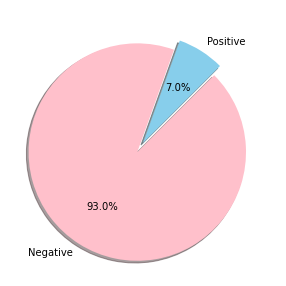

In [4]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [10]:
df=["  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction"]
bag=count.fit_transform(df)
print(count.get_feature_names())

['and', 'drags', 'dysfunction', 'dysfunctional', 'father', 'he', 'his', 'into', 'is', 'kids', 'selfish', 'so', 'when']


In [11]:
print(bag.toarray())

[[1 1 1 1 1 1 2 1 2 1 1 1 1]]


In [18]:
import re
def preprocessor(tweet):
             tweet=re.sub('<[^>]*>','',tweet)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',tweet)
             tweet=re.sub('[\W]+',' ',tweet.lower()) +\
                ' '.join(emojis).replace('-','')
             return tweet

In [19]:
preprocessor(data.loc[0,'tweet'][-50:])

'ish he drags his kids into his dysfunction run'

In [20]:
data['tweet']=data['tweet'].apply(preprocessor)

In [21]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()

In [22]:
def tokenizer(tweet):
        return tweet.split()

In [23]:
def tokenizer_porter(tweet):
    return [porter.stem(word) for word in tweet.split()]

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)

In [28]:
y=data.label.values
x=tfidf.fit_transform(data.tweet)

In [29]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_blobs(n_samples=1000)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(500, 2) (500, 2) (500,) (500,)


In [30]:
from sklearn.linear_model import LogisticRegressionCV

clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)

y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    5.0s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.1s finished


In [31]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.944


In [32]:
from sklearn.linear_model import SGDClassifier
clf= SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.938
